In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns

from matplotlib import pyplot as plt
from hnea_genes import *

In [2]:
mkdir -p ../figures/figS1

In [3]:
counts_df = pd.read_csv('../data/Hnea/CFU_counts/hnea_mutants.csv')
mean_tech_reps_df = counts_df.groupby('genotype,cond,bio_replicate'.split(',')).mean().reset_index()
mean_tech_reps_df

,genotype,cond,bio_replicate,tech_replicate,CFU/mL
0,WT,5% CO2,1,2.0,5.556667e+08
1,WT,5% CO2,2,2.0,2.776667e+08
2,WT,5% CO2,3,2.0,1.112333e+09
3,WT,ambient,1,2.0,5.556667e+08
4,WT,ambient,2,2.0,3.780000e+08
5,WT,ambient,3,2.0,5.556667e+08
6,dCsosCA,5% CO2,1,2.0,3.666667e+08
7,dCsosCA,5% CO2,2,2.0,9.990000e+07
8,dCsosCA,5% CO2,3,2.0,1.445667e+08
9,dCsosCA,ambient,1,2.0,0.000000e+00


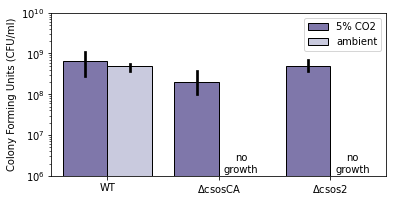

In [4]:
plt.figure(figsize=(6,3))
plt.yscale('log')
pal = sns.color_palette('Purples_r', n_colors=2)

order = 'WT,dCsosCA,dS2'.split(',')
strain_labels = 'WT,$\Delta$csosCA,$\Delta$csos2'.split(',')
bars = sns.barplot(data=mean_tech_reps_df, y='CFU/mL', x='genotype', hue='cond', palette=pal, 
                   edgecolor='k', lw=1, errcolor='k')

plt.legend()
plt.ylim(1e6, 1e10)
plt.text(1.2, 1.2e6, 'no\ngrowth', ha='center')
plt.text(2.2, 1.2e6, 'no\ngrowth', ha='center')
plt.xlabel('')
plt.ylabel('Colony Forming Units (CFU/ml)', fontsize=10)
plt.xticks(np.arange(3), strain_labels, fontsize=10)

plt.savefig('../figures/figS1/figS1.png', facecolor='w', dpi=600)
plt.show()